In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv("car data.csv")
print(data.head())

  Car_Name    Year  Present_Price  Kms_Driven Fuel_Type Transmission  \
0     ritz  2014.0           5.59     27000.0    Petrol       Manual   
1      sx4  2013.0           9.54     43000.0    Diesel       Manual   
2     ciaz  2017.0           9.85      6900.0    Petrol       Manual   
3  wagon r  2011.0           4.15      5200.0    Petrol       Manual   
4    swift  2014.0           6.87     42450.0    Diesel       Manual   

    First Owner  Selling_Price  
0  Second Owner           3.35  
1   Third Owner           4.75  
2   First Owner           7.25  
3   First Owner           2.85  
4   First Owner           4.60  


     Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0              0.0               0.0               1.0   
1              0.0               1.0               0.0   
2              0.0               0.0               1.0   
3              0.0               0.0               1.0   
4              0.0               1.0               0.0   
..             ...               ...               ...   
296            0.0               1.0               0.0   
297            0.0               0.0               1.0   
298            0.0               0.0               1.0   
299            0.0               1.0               0.0   
300            0.0               0.0               1.0   

     Transmission_Automatic  Transmission_Manual  First Owner_First Owner  \
0                       0.0                  1.0                      0.0   
1                       0.0                  1.0                      0.0   
2                       0.0                  1.0                      1.

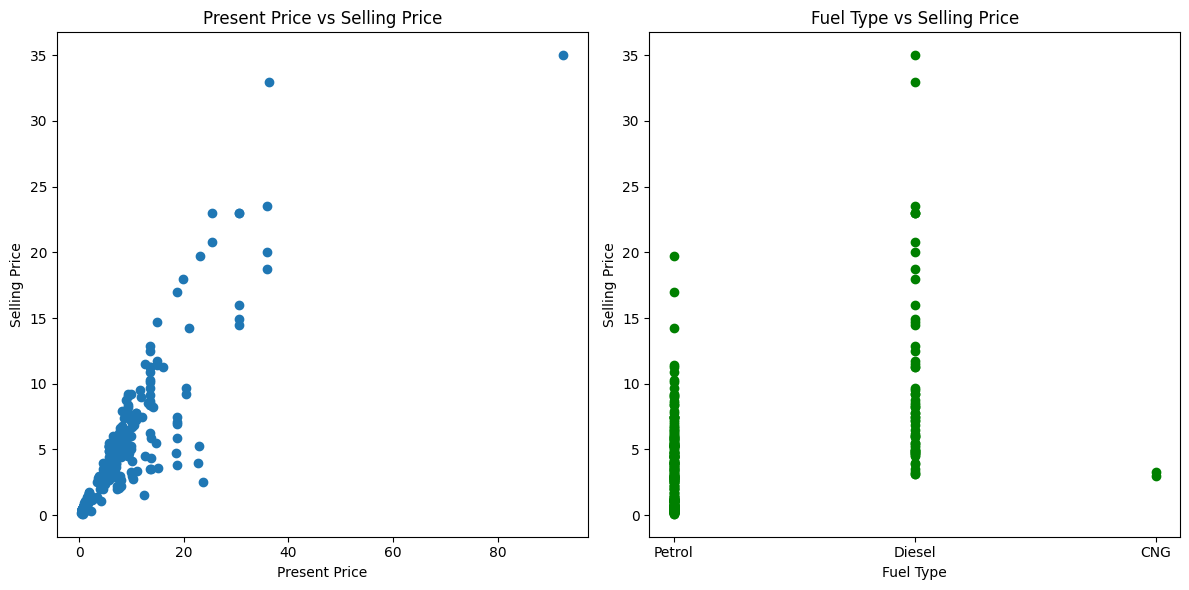

In [11]:

df = pd.DataFrame(data)
df.drop(columns=['Car_Name'],axis=1,inplace=True)
df=df.dropna()


# One-hot encoding for 'city' feature
cat_col= df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False) # to create dense
encoded = encoder.fit_transform(df[cat_col]) # fit and transform the data [[]] to make it df not series, result is 2D array
# labels the columns appropriately according to categories
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out()) # convert 2D array into pandas df again
# Combine encoded data with other features
df_encoded = pd.concat([encoded, df.drop(columns=cat_col)], axis=1) # axis=1: This specifies that the concatenation should occur horizontally, i.e., along the column axis.

print(encoded)
# Split data into features (X) and target variable (y)
X = df_encoded
y = df['Selling_Price']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

plt.figure(figsize=(12, 6))

# Plot for a numerical feature (e.g., 'Present_Price' vs 'Selling_Price')
plt.subplot(1, 2, 1)
plt.scatter(df['Present_Price'], df['Selling_Price'])

plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Present Price vs Selling Price')

# Plot for a categorical feature (e.g., 'Fuel_Type' after encoding vs 'Selling_Price')
plt.subplot(1, 2, 2)
plt.scatter(df['Fuel_Type'], df['Selling_Price'],color='green')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Fuel Type vs Selling Price')

plt.tight_layout()
plt.show()

In [7]:
print(df_encoded)


     Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0              0.0               0.0               1.0   
1              0.0               1.0               0.0   
2              0.0               0.0               1.0   
3              0.0               0.0               1.0   
4              0.0               1.0               0.0   
..             ...               ...               ...   
296            0.0               1.0               0.0   
297            0.0               0.0               1.0   
298            0.0               0.0               1.0   
299            0.0               1.0               0.0   
300            0.0               0.0               1.0   

     Transmission_Automatic  Transmission_Manual  First Owner_First Owner  \
0                       0.0                  1.0                      0.0   
1                       0.0                  1.0                      0.0   
2                       0.0                  1.0                      1.

In [8]:
print(encoded)

     Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0              0.0               0.0               1.0   
1              0.0               1.0               0.0   
2              0.0               0.0               1.0   
3              0.0               0.0               1.0   
4              0.0               1.0               0.0   
..             ...               ...               ...   
296            0.0               1.0               0.0   
297            0.0               0.0               1.0   
298            0.0               0.0               1.0   
299            0.0               1.0               0.0   
300            0.0               0.0               1.0   

     Transmission_Automatic  Transmission_Manual  First Owner_First Owner  \
0                       0.0                  1.0                      0.0   
1                       0.0                  1.0                      0.0   
2                       0.0                  1.0                      1.

In [9]:
# plt.scatter(y_test, X_train,color='green')
